**Analyzing returns of BYD**

In [1]:
## importing packages needed

import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats



In [2]:
## using pandas_datareader to extract data from yahoo

stock_data = dr.data.get_data_yahoo('BYDDF')

In [3]:
## Checking data 

stock_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-28,13.83,13.610000,13.80,13.710000,85200.0,13.710000
2020-09-29,14.26,14.010000,14.11,14.160000,204200.0,14.160000
2020-09-30,16.32,15.720000,15.72,16.230000,540000.0,16.230000
2020-10-01,16.99,16.450001,16.99,16.690001,456700.0,16.690001
2020-10-02,16.52,16.150000,16.25,16.230000,338600.0,16.230000


In [4]:
## Creating a new column Returns based on the calculations using the Adjusted close column
## Then checking data to see if everything worked out

stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2015-10-05,5.59,5.50,5.54,5.57,104600.0,4.997129,NaN
2015-10-06,5.83,5.68,5.68,5.76,103300.0,5.167588,0.034111
2015-10-07,6.00,5.90,5.94,5.91,84900.0,5.302161,0.026042
2015-10-08,5.88,5.82,5.88,5.87,81200.0,5.266274,-0.006768
2015-10-09,5.74,5.61,5.67,5.63,159700.0,5.050959,-0.040886


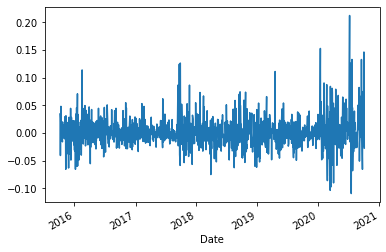

In [5]:
## Plotting our returns data 

stock_data['Returns'].plot()

In [6]:
## Calculating the percetange, from our returns because it was a decimal between 0 and 1

percent_return = stock_data['Returns'] * 100


In [7]:
## Dropping rows with NA values 

returns_plot = percent_return.dropna()

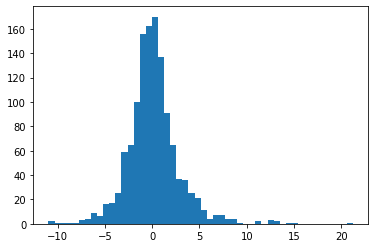

In [10]:
## Plotting data as a histogram 

plt.hist(returns_plot, bins=50, density=False)
plt.show()

In [11]:
## Calculating Average Daily return
mean_return_daily = np.mean(stock_data['Returns'])
print(mean_return_daily * 100) 

0.13149626059808373


In [12]:
## Calculating Annualized return
mean_return_annualized = ((1+mean_return_daily)**252) - 1
print(mean_return_annualized*100)

39.25726969910806


In [13]:
## Calculating volatility
## then printing the percentage volatility
sigma_daily = np.std(stock_data['Returns'])
print(sigma_daily*100)

2.7750022348842043


In [14]:
## Calculating Daily Variance
variance_daily = sigma_daily**2
print(variance_daily)

0.0007700637403612329


In [15]:
## Annualized volatility (Assuming 252 trading days in a year)
sigma_annualized = sigma_daily*np.sqrt(252)
print(sigma_annualized)

0.4405179480691232


In [16]:
## Calculating Annualized variance

variance_annualized = sigma_annualized**2
print(variance_annualized)

0.19405606257103072


In [17]:
### Skewness: measure of how much a distribution leans to the left or right.
### Negative skew: right leaning curve
### Positive skew: left leaning curve


### Kurtosis: measure of the thickness of the tails of a distribution
### Normal dist has a kurtosis of around 3
### Financial returns tend to be leptokurtic.  kurtosis > 3


In [18]:
## importing library necessary to Calculate Skewness and Kurtosis

from scipy.stats import skew
from scipy.stats import kurtosis

In [19]:
## checking for skewness
## if it is close to 0 then we assume it is normally dist, 
## otherwise it is not normal

clean_returns = stock_data['Returns'].dropna()
returns_skewness = stats.skew(clean_returns)

print(returns_skewness)

1.0694708237152


In [20]:
## kurtosis() automatically returns the excess curtosis (kurtosis - 3)
## 3 is the kurtosis of a normal distribution 
excess_kurtosis = stats.kurtosis(clean_returns)
print(excess_kurtosis)


6.228462435235377


In [21]:
## testing for normality
## [1] is there because the function returns 2 values, the t-stat and p-value, 
## the p-value is second on the list so it is at index 1
p_value = stats.shapiro(clean_returns)[1]
if p_value <= 0.05:
  print('Null hypothesis of normality is rejected')
else:
  print('Null hypothesis of normality is accepted')

Null hypothesis of normality is rejected
